# Logistic Regression

## Importing the libraries

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Importing the dataset

In [231]:
data = pd.read_csv('HRV.csv')

In [232]:
data.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## Dataset Preprocessing

In [234]:
# update missing values
totChol = data['totChol'].median()
bmi = data['BMI'].median()
heartRate = data['heartRate'].median()
glucose = data['glucose'].median()

In [235]:
data['totChol'].fillna(totChol, inplace=True)
data['BMI'].fillna(bmi, inplace=True)
data['heartRate'].fillna(heartRate, inplace=True)
data['glucose'].fillna(glucose, inplace=True)

In [236]:
data.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [237]:
data.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [238]:
x = data[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']]
y = data[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [239]:
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=.20, random_state=42)

In [240]:
x_test, x_val, y_test, y_val = train_test_split(x_rest, y_rest, test_size=.50, random_state=42)

## Training the Logistic Regression model 

In [241]:
regressor = LinearRegression()
regressor.fit(x_train.values, y_train)

LinearRegression()

In [242]:
print("Coefficients", regressor.coef_)
print("Intercept", regressor.intercept_)

Coefficients [[ 6.37304804e-02  7.29905281e-03  4.10634823e-02  4.34537112e-05
   2.70303182e-03 -5.57207843e-04  9.92078740e-04 -7.68749433e-05
   1.47148233e-03]]
Intercept [-0.7152271]


## Predicting a new result
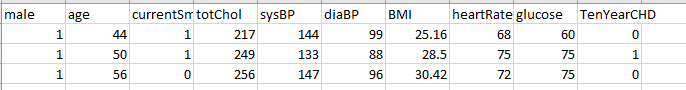

In [243]:
x_test.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
3683,1,40,1,186.0,131.0,81.0,22.14,86.0,87.0
2167,0,62,0,205.0,118.0,79.5,30.21,82.0,75.0
551,0,55,1,233.0,128.0,94.0,36.62,80.0,95.0
2358,1,58,0,200.0,128.0,83.0,29.63,68.0,80.0
3401,1,52,0,225.0,132.0,88.0,23.35,72.0,69.0


In [244]:
y_pred = regressor.predict(x_test.values)

In [245]:
regressor.predict([[1, 44, 1, 217, 144, 99, 25.16, 68, 60]])

array([[0.16224979]])

In [246]:
regressor.predict([[1, 50, 1, 249, 133, 88, 28.5, 75, 75]])

array([[0.20867821]])

In [247]:
regressor.predict([[1, 56, 0, 256, 147, 96, 30.42, 72, 75]])

array([[0.24723342]])

### Confusion matrix, Confusion matrix display and classification report

In [248]:
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)

[[369   0]
 [ 53   1]]


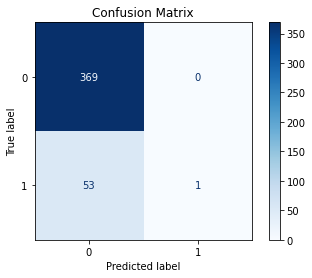

In [249]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [251]:
class_report = classification_report(y_test, np.round(y_pred))
print(class_report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       369
           1       1.00      0.02      0.04        54

    accuracy                           0.87       423
   macro avg       0.94      0.51      0.48       423
weighted avg       0.89      0.87      0.82       423



### Discuss the results

### True Positives 
- the number of samples that were correctly classified as positive (1)

### True Negatives 
- the number of samples that were correctly classified as negative (369)

### False Positives 
- the number of samples that were incorrectly classified as positive when they were actually negative (0)

### False Negatives (FN) 
- the number of samples that were incorrectly classified as negative when they were actually positive (53)

### Accuracy
- Accuracy of the model was 87% which means that 87% of samples in the test data were correctly identified.

### F1 Score
- F1 was excellent for 0 (93%) and poor for 1 (4%) which means that the model performs poorly when trying to predict a TenYearCHD of 1.

### Summary

Based on the given confusion matrix and classification report, the model seems to perform well for class 0, achieving high precision, recall, and F1-score, and correctly classifying all samples in this class. However, the model performs poorly for class 1, with low recall and F1-score, indicating that it struggles to correctly identify samples in this class. Overall, the model's accuracy is 87%, but its performance is imbalanced, with significantly better results for one class compared to the other. To improve the results, the dataset will have to be significantly bigger.